# 4-TOPSHIRIQ. Tuzgan modelingizni baholang:

In [3]:
import pandas as pd
import numpy as np
import string
import csv
import random
import warnings


In [3]:
# Kutubxonalarni import qilish
## Boshlang'ich kutubxonalar
import pandas as pd
import numpy as np
import warnings

## Modelni qurish 
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Ma'lumotlarni vizualazizatsiyalash
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1.  Modelning Aniqlanish koeffisiyentini toping va xulosani chop etingng.

In [6]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_data = pd.read_csv('data6.csv', sep=',')
print(df_data.shape)
df_data

(19, 4)


,ijtimoiy holati,o'rtacha bahosi,davomat,kursdan o'tishi
0,0,1.8,25,0
1,6,3.6,87,1
2,4,3.4,82,1
3,1,2.2,21,0
4,6,2.6,42,0
5,5,3.2,83,1
6,0,3.2,50,0
7,4,2.6,65,1
8,3,2.8,31,0
9,5,2.6,37,0


In [12]:
X = df_data[["ijtimoiy holati", "o'rtacha bahosi","davomat"]]
X = sm.add_constant(X) # O'zgarmaslarni qo'shish
olsmod = sm.OLS(df_data["kursdan o'tishi"], X).fit()
print('R2 score:', olsmod.rsquared)

R2 score: 0.6653422082167253


Natija:  R2 score: 0.6653422082167253

R² diapazoni 0 va 1 oralig'ida, bu erda R²=0 o'zgaruvchilar o'rtasida chiziqli munosabat yo'qligini bildiradi va R²=1 mukammal chiziqli munosabatni ko'rsatadi. Bizning holatda, biz taxminan 0,6653 R² ball oldik, ya'ni bizning bog'liq o'zgaruvchimizning 66,53% mustaqil o'zgaruvchiga tasir qiladi.

## 2. Modelni F-test(ANOVA) bo'yicha tekshiring va xulosani chop eting.

In [10]:
print('F-statistic:', olsmod.fvalue)
print("Hech bo'lmaganda F-statistika kabi yuqori qiymatni kuzatish ehtimoli:", olsmod.f_pvalue)

F-statistic: 9.94063524819411
Hech bo'lmaganda F-statistika kabi yuqori qiymatni kuzatish ehtimoli: 0.0007398868035459624


F-statistika kabi yuqori qiymatni kuzatish ehtimoli: 0.0007398868035459624
Bizning f_pvalue 0,05 dan past bo'lganligi uchun mustaxkam va kuchli ishlaydi, aks holda bizning modelimiz kuchsiz ishlaydigon madel sifatida qaralar edi xulosa o’rnida bizning model qiymati 0.0007 bo’lgani uchun juda mustaxkam va kuchli ishlaydi degan xulosaga kelishimiz mumkin.

## 3. Modelni T-test bo'yicha tekshiring va xulosani chop eting.

In [14]:
print(olsmod.pvalues)

const              0.142006
ijtimoiy holati    0.779550
o'rtacha bahosi    0.490471
davomat            0.000576
dtype: float64


Bizning ikkala mustaqil o'zgaruvchimiz, ijtimoiy holati, o'rtacha bahosi  va davomat , p-qiymati 0,05 dan kam bo'lib yani 0.0007 bo’lganligi uchun, bu talabaning kursdan kursga o’tish xolatigaga ta'sir qilishiga yetarli dalillar mavjudligini ko'rsatadi.

# Modelda taxminlar testini tekshiring:

In [15]:
df_data['pass_course_pred'] = olsmod.predict(X)
df_data['residual'] = olsmod.resid
df_data.head()

,ijtimoiy holati,o'rtacha bahosi,davomat,kursdan o'tishi,pass_course_pred,residual
0,0,1.8,25,0,-0.126516,0.126516
1,6,3.6,87,1,0.887436,0.112564
2,4,3.4,82,1,0.816893,0.183107
3,1,2.2,21,0,-0.139886,0.139886
4,6,2.6,42,0,0.139173,-0.139173


## 1. Modelni chiziqlilikga tekshiring. Bunda mustaqil va bog'liq o'zgaruvchilar o'rtasida bog'liqlik borligi haqida xulosa qiling.

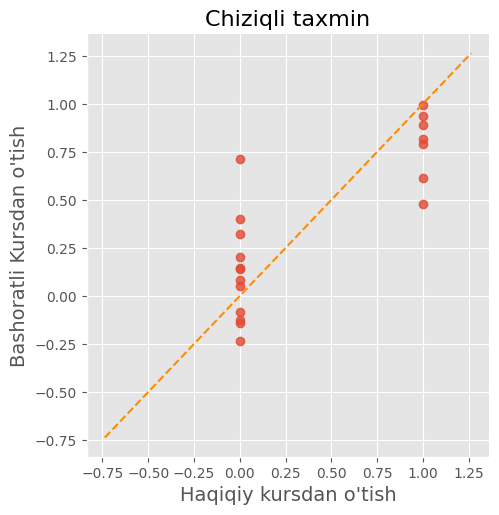

In [20]:
# Kuzatilgan va bashorat qilingan qiymatlarni chizish
sns.lmplot(x='kursdan o\'tishi', y='pass_course_pred', data=df_data, fit_reg=False)
    
# Diagonal chiziq chizish
line_coords = np.arange(df_data[['kursdan o\'tishi', 'pass_course_pred']].min().min()-0.5, 
                        df_data[['kursdan o\'tishi', 'pass_course_pred']].max().max()+0.5)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Bashoratli Kursdan o\'tish', fontsize=14)
plt.xlabel('Haqiqiy kursdan o\'tish', fontsize=14)
plt.title('Chiziqli taxmin', fontsize=16)
plt.show()

Tarqalish chizmalari diagonal chiziq bo'ylab teng ravishda tarqalmaganligisababli talabaning kursdan kursga o’tish modeli qoldiq nuqtani ko'rsatadi, shuning uchun mustaqil va qaram o'zgaruvchilar o'rtasida chiziqli bog'liqlik bor deb taxmin qilishimizga qiyinchilik tug’dirdi vachiziqlilik taxminiga uncha mos kelmadi degan hulosaga kelindi

## 2. Modelning normal taqsimlanganini aniqlang va xulosani chop eting.

Anderson-Darling testining p-qiymati 0,05 dan past bo'lsa, odatda normal emas degan ma'noni anglatadi: 0.6576431999202214


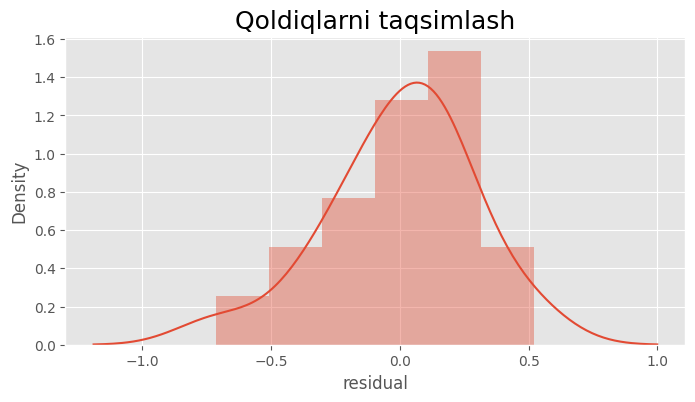

Qoldiqlar odatda taqsimlanadi


In [22]:
from statsmodels.stats.diagnostic import normal_ad

# Qoldiqlar bo'yicha test o'tkazish
p_value = normal_ad(df_data['residual'])[1]
print("Anderson-Darling testining p-qiymati 0,05 dan past bo'lsa, odatda normal emas degan ma'noni anglatadi:", p_value)

# Qoldiqlarni taqsimlash sxemasini tuzish
plt.subplots(figsize=(8, 4))
plt.title('Qoldiqlarni taqsimlash', fontsize=18)
sns.distplot(df_data['residual'])
plt.show()

# Qoldiqlarning normalligi haqida xabar berish
if p_value < 0.05:
    print('Qoldiqlar odatda taqsimlanmagan')
else:
    print('Qoldiqlar odatda taqsimlanadi')


Yuqoridagi koddan biz 0,6575 p-qiymatini oldik, uni normal deb hisoblash mumkin, chunki u 0,05 chegaradan yuqori. Gistogramma syujeti normal taqsimotni ham ko'rsatadi (bu biroz egri ko'rinishi mumkin, chunki bizning ma'lumotlar to'plamimizda atigi 18 ta kuzatuv mavjud). Ushbu ikkala natijadan biz qoldiqlarimiz normal taqsimlangan deb taxmin qilishimiz mumkin.

## 3. Modelni multikollinearlikka tekshiring va xulosani chop eting.

Har bir o'zgaruvchining Person korrelyatsiya koeffitsienti matritsasi:
                  ijtimoiy holati  o'rtacha bahosi   davomat
ijtimoiy holati         1.000000         0.451937  0.389946
o'rtacha bahosi         0.451937         1.000000  0.493872
davomat                 0.389946         0.493872  1.000000


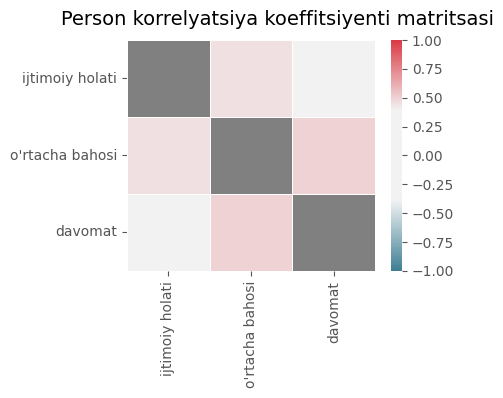

In [24]:
corr = df_data[["ijtimoiy holati", "o'rtacha bahosi","davomat"]].corr()
print("Har bir o'zgaruvchining Person korrelyatsiya koeffitsienti matritsasi:\n", corr)

# Diagonal hujayra uchun niqob yarating
mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, val=True)

# Matplotlib ishga tushirish
fig, ax = plt.subplots(figsize=(4, 3))

# Maxsus ajralib turuvchi rang xaritasini yaratish
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Niqob va to'g'ri tomonlar nisbati bilan issiqlik xaritasini chizing
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Person korrelyatsiya koeffitsiyenti matritsasi', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()



Rasm ijtimoiy holati, o'rtacha bahosi  va davomat o'rtasida qandaydir ijobiy munosabat va nijtimoiy holati, o'rtacha bahosi  va davomat o'rtasida salbiy munosabat mavjudligini ko'rsatadi. Bu ikkala natija ham bizning oldingi modelimizni qo'llab-quvvatlaydi. Eng muhimi, ijtimoiy holati, o'rtacha bahosi  va davomat  qanday qilib deyarli 0 korrelyatsiya koeffitsientiga ega ekanligiga e'tibor bering. Bu bizning ikkala mustaqil o'zgaruvchimiz bir-biriga ta'siri borligini va bizning ma'lumotlarimizda multikollinearlik borliginiligini anglatadi.

## 4. Modelda avtokorellatsiya mavjudligini aniqlang.

In [26]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_data['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Musbat avtokorrelyatsiya belgilari', '\n')
    print('Taxmin qanoatlantirmadi')
elif durbinWatson > 2.5:
    print('Manfiy Salbiy avtokorrelyatsiya belgilari', '\n')
    print(' Taxmin qanoatlantirmadi ')
else:
    print("Avtokorrelyatsiya deyarli yo'q", '\n')
    print('Taxmin qanoatlantirdi')

Durbin-Watson: 2.592185836709814
Manfiy Salbiy avtokorrelyatsiya belgilari 

 Taxmin qanoatlantirmadi 


Bizning modelimiz Durbin-Watson ballini taxminan 2.5921 ga ega bo'ldi, bu 1,5 dan 2,5 gacha oralig’ida emas  shuning uchun bizning qoldiqimizda avtokorrelyatsiya ega  deb taxmin qilishimiz mumki va keyinchalik yangi ma’lumot qo’shilishiga chidamlik emas